<a href="https://colab.research.google.com/github/CorentinDieudonne/DataSpaces/blob/master/data_space_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

celtic rock
alaska indie
hollywood
irish singer-songwriter
downtempo
contemporary country
downtempo
[0.27386155 0.14933101 0.12092755 0.11178367 0.09304127]
---------RBF K--------------
{'gamma': array([0.1       , 1.06666667, 2.03333333, 3.        ]), 'C': array([1.        , 1.66666667, 2.33333333, 3.        ])}
The optimal parameters are : {'C': 1.0, 'gamma': 0.1} with a score of : 0.6401377410468319
---------DECISION TREE--------------
The depth max of the classifier is: 20
The importance of the different parameter is equals to : [0.57389122 0.42610878]
decision tree has a score of : 0.5537190082644629
---------RANDOM FOREST--------------
The importance of the different parameter is equals to : [0.47837609 0.52162391]
random forest has a score of : 0.6198347107438017


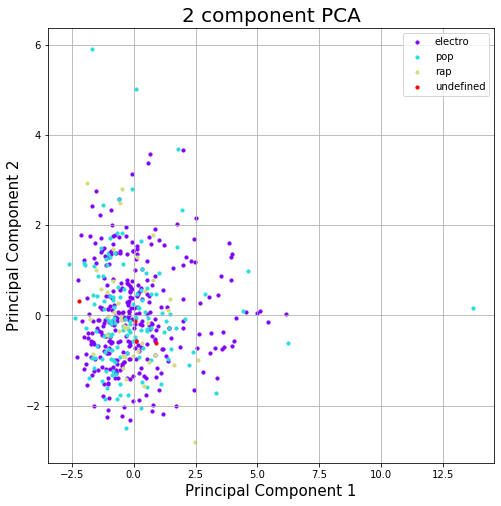

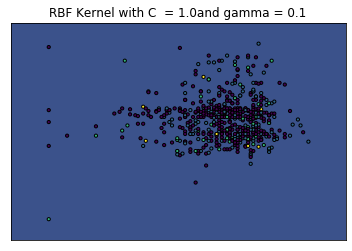

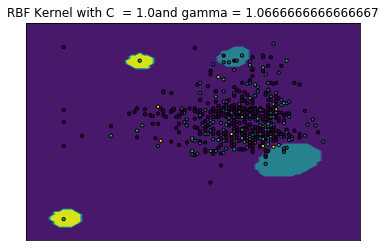

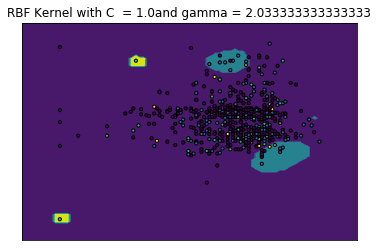

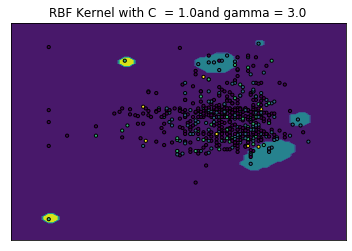

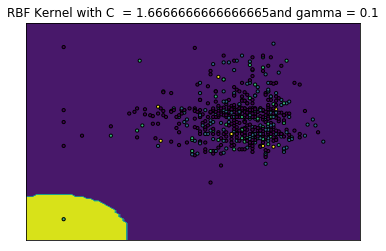

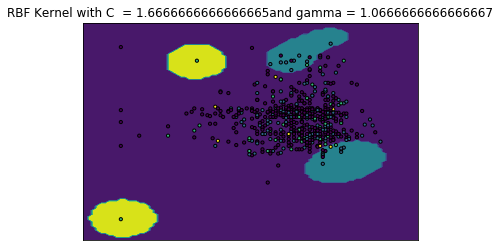

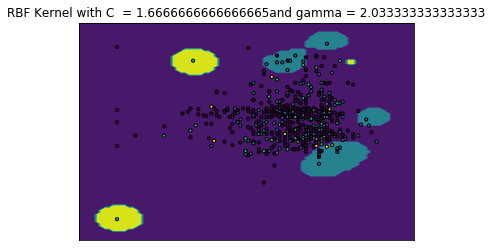

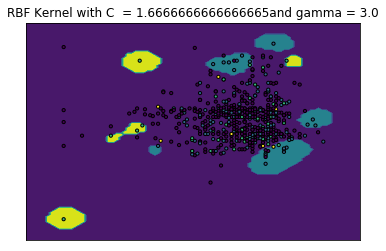

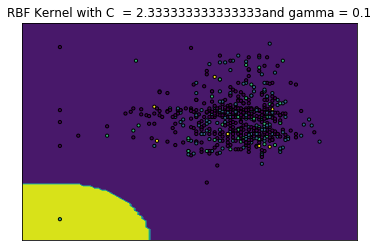

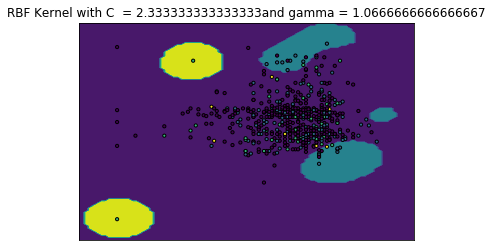

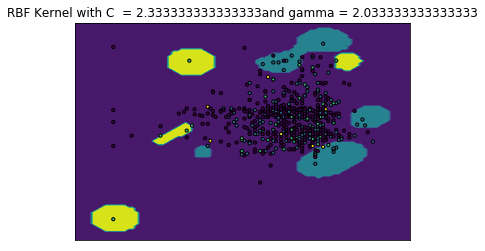

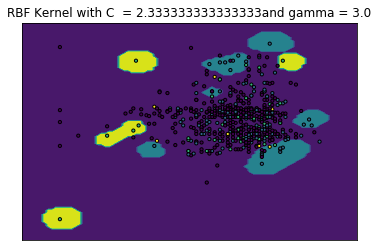

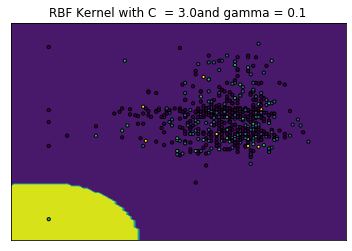

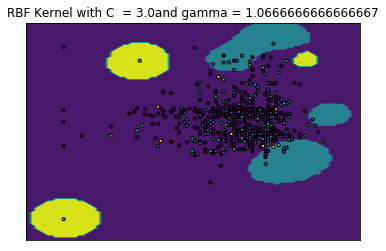

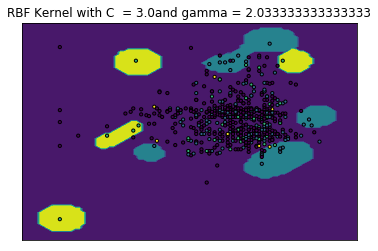

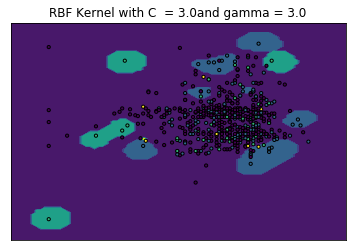

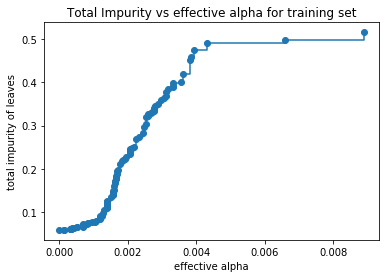

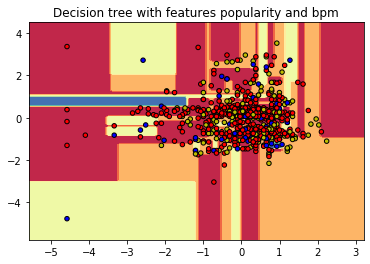

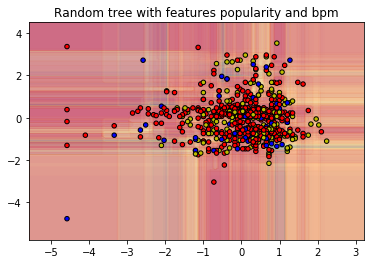

In [35]:
!pip3 install squarify
!pip3 install sklearn
!pip3 install pandas

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats
import squarify as sq
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from sklearn import decomposition
from sklearn import model_selection
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier)
from matplotlib.colors import ListedColormap

def make_meshgrid(x, y, h):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    return xx, yy

def group(y):
    for i in range(len(y)):
        if (('electro' in y[i]) | 
        ('step' in y[i]) |
        ('complextro' in y[i]) |
        ('room' in y[i]) | 
        ('dance' in y[i]) | 
        ('wave' in y[i]) | 
        ('edm' in y[i]) | 
        ('house' in y[i])):
            y[i] = 'electro'
        elif (('hip' in y[i]) | 
        ('latin' in y[i]) | 
        ('r&b' in y[i]) | 
        ('rap' in y[i]) | 
        ('soul' in y[i])):
            y[i] = 'rap'
        elif (('pop' in y[i]) | ('mellow' in y[i]) | ('band' in y[i])):
            y[i] = 'pop'
        else :
            print(y[i])
            y[i] = 'undefined'
    return y

filename='https://raw.githubusercontent.com/CorentinDieudonne/DataSpaces/master/top10s.csv'
df=pd.read_csv(filename,encoding='ISO-8859-1')
df = df.reset_index()

df.rename(columns={'Track.Name':'track_name',
'top genre' : 'genre',
'live':'liveness',
'acous' : 'acousticness',
'nrgy' : 'energy',
'dnce' : 'danceability',
'val' : 'valence',
'dur':'duration', 
'pop':'popularity',
'spch':'speechiness'},inplace=True)

#-------------------------------------------------------------------------------------------
genre_size=df.groupby('genre').size()
genre_list=df['genre'].values.tolist()
#Here we get the repartition of each genre in the dataset : we consider working with 27 different genres.
#-------------------------------------------------------------------------------------------

#choose features that are going to be exploited & data split into test and train : 
#-------------------------------------------------------------------------------------------
allfeatures = ['popularity', 'acousticness', 'danceability', 'energy', 'liveness', 'speechiness', 'valence', 'dB', 'bpm']
features = ['popularity', 'bpm']

#genres = ['big room', 'british soul', 'electropop',]
genres = genre_list

#X = df.loc[df['genre'].isin(genres), features].values
#y = df.loc[df['genre'].isin(genres), 'genre'].values

X = df.loc[:, allfeatures].values
y = df.loc[:, 'genre'].values
y = group(y)

le = preprocessing.LabelEncoder()
le.fit(y)
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
X_train = StandardScaler().fit_transform(X_train)


targets = list(le.classes_)
#-------------------------------------------------------------------------------------------

def pca5():
    #1st operation : PCA in order to know which components are the most representative of the dataset
    #-------------------------------------------------------------------------------------------
    # Fit on training set
    pca = PCA(n_components=5)
    pca.fit_transform(X_train)
    principalComponents = pca.fit_transform(X_train)
    print(pca.explained_variance_ratio_)
    principalDf = pd.DataFrame(data = principalComponents
                , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4','principal component 5'])

    finalDf = pd.concat([principalDf, df[['genre']]], axis = 1)

    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)

    colors = cm.rainbow(np.linspace(0, 1, len(targets)))
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['genre'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                , finalDf.loc[indicesToKeep, 'principal component 2']
                , c = color
                , s = 10)
    ax.legend(targets)
    ax.grid()

def rbf_k():
    print("---------RBF K--------------")
    X = df.loc[:, features].values
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
    X_train = StandardScaler().fit_transform(X_train)

    #2nd step : Apply SVM to the dataset by using a kernel trick, we perform first a grid search
    C_range = np.linspace(1, 3, 4)
    gamma_range = np.linspace(0.1, 3, 4)
    param_grid = dict(gamma=gamma_range, C=C_range)
    print(param_grid)
    grid = GridSearchCV(svm.SVC(kernel='rbf'), param_grid)
    grid.fit(X, y)

    # display optimal parameters.
    print("The optimal parameters are : " + str(grid.best_params_) + " with a score of : " + str(grid.best_score_))

    classifiers = []
    for C in C_range:
        for gamma in gamma_range:
            clf = SVC(C=C, gamma=gamma)
            clf.fit(X_train, y_train)
            classifiers.append((C, gamma, clf))
    xx, yy = make_meshgrid(X[:, 0], X[:, 1], 0.1)

    """
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.subplot(len(C_range), len(gamma_range))

    # visualize parameter's effect on decision function
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.xticks(())
    plt.yticks(())
    """

    for (k, (C, gamma, clf)) in enumerate(classifiers):
        # evaluate decision function in a grid
        #Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # visualize decision function for these parameters
        plt.figure()
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.contourf(xx, yy, Z, c=plt.cm.Spectral)
        plt.scatter(X[:, 0], X[:, 1], c=y, s=10,
                    edgecolors='k')

        # visualize parameter's effect on decision function
        plt.xticks(())
        plt.yticks(())
        plt.title("RBF Kernel with C  = " + str(C) + "and gamma = " + str(gamma))
    
    #plt.savefig('/Users/victorseguin/Desktop/python_plots/plotrbfkerneloptimal.eps', format='eps')
    #-------------------------------------------------------------------------------------------

def decision_tree():
    print("---------DECISION TREE--------------")
    X = df.loc[:,features].values
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
    X_train = StandardScaler().fit_transform(X_train)

    classifier = DecisionTreeClassifier(max_depth=None)
    classifier.fit(X_train, y_train)
    cost_complexity = classifier.cost_complexity_pruning_path(X_train, y_train)
    ccp_alphas, impurities = cost_complexity.ccp_alphas, cost_complexity.impurities
    fig, ax = plt.subplots()
    print('The depth max of the classifier is: ' + str(classifier.tree_.max_depth))
    print('The importance of the different parameter is equals to : '+ str(classifier.feature_importances_))
    scores = classifier.score(X_test, y_test)
    print('decision tree has a score of : '+ str(scores))

    xx, yy = make_meshgrid(X[:, 0], X[:, 1], 0.1)

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.title("Decision tree with features "+ 
               features[0] + " and "+ features[1])
    plt.scatter(X[:, 0], X[:, 1], c=y,
                cmap=ListedColormap(['r', 'y', 'b']),
                edgecolor='k', s=20)


def random_forest():
    print("---------RANDOM FOREST--------------")
    X = df.loc[:, features].values
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
    X_train = StandardScaler().fit_transform(X_train)
    #24 = sqrt(600), best parameter is m = sqrt(p) for random forest classifier
    classifier = RandomForestClassifier(n_estimators=24,warm_start=True,oob_score=True)
    classifier.fit(X_train, y_train)
    scores = classifier.score(X_test, y_test)
    print('The importance of the different parameter is equals to : '+ str(classifier.feature_importances_))
    print('random forest has a score of : '+ str(scores))

    xx, yy = make_meshgrid(X[:, 0], X[:, 1], 0.1)
    estimator_alpha = 1.0 / len(classifier.estimators_)
    plt.figure()
    plt.title("Random tree with features "+ 
              features[0] + " and "+ features[1])

    for tree in classifier.estimators_:
        Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=plt.cm.Spectral)

    plt.scatter(X[:, 0], X[:, 1], c=y,
                cmap=ListedColormap(['r', 'y', 'b']),
                edgecolor='k', s=20)


pca5()
rbf_k()
decision_tree()
random_forest()
plt.show()

In [0]:
def rbf_kernel():
    print("===========START KERNEL ==========")
    X = df.loc[:, features].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
    X = StandardScaler().fit_transform(X)

    C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

    gamma = 1
    scores = np.zeros(7, dtype=float)
    i = 0

    for c in C:
        model = svm.SVC(C=c)
        model.fit(X_train, y_train)

        xx, yy = make_meshgrid(X_train[:, 0], X_train[:, 1], 0.1)
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        print("C = " + str(c))

        plt.figure()
        plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Spectral, edgecolors='k')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())

        #plt.xlabel(x_label)
        #plt.ylabel(y_label)
        plt.xticks(())
        plt.yticks(())
        plt.title("RBF Kernel with C = " + str(c) + " and gamma = " + str(gamma))
        #plt.savefig('/Users/victorseguin/Desktop/python_plots/plotrbfkernel' + '_C' + str(c) + '.eps', format='eps')
        scores[i] = model.score(X_test, y_test)
        print (model.score(X_test, y_test))
        i += 1

    plt.figure()
    plt.title("Scores of the RBF Kernel classifier according to the C number")
    plt.xlabel("C number")
    plt.ylabel("prediction score")
    plt.scatter(C, scores)
    #plt.savefig('/Users/victorseguin/Desktop/plots/data_space_plot/scoresrbfkernel.eps', format='eps')
    
    indice = [i for i, x in enumerate(scores) if x == max(scores)]
    print("best indice : " + str(C[indice[0]]))

    model = svm.SVC(kernel='rbf', gamma=2, C=C[indice[0]])
    model.fit(X_train, y_train)

    score_test = model.score(X_test, y_test)
    print("score on test set : " + str(score_test))
    
    gamma_range = np.logspace(-2, 2, 10)
    param_grid = {'C': C, 'gamma': gamma_range}

    grid = model_selection.GridSearchCV(svm.SVC(kernel='rbf'), param_grid, scoring='accuracy')
    grid.fit(X_train, y_train)

    # display optimal parameters.
    print("The optimal parameters are : " + str(grid.best_params_) + " with a score of : " + str(grid.best_score_))

    classifier = svm.SVC(kernel='rbf', gamma=grid.best_params_['gamma'], C=grid.best_params_['C'])
    classifier.fit(X_train, y_train)


    # repeat grid search with the new merged set :
    gamma_range = np.logspace(-2, 2, 10)
    param_grid = {'C': C, 'gamma': gamma_range}

    grid = model_selection.GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=5, scoring='accuracy')
    grid.fit(X_test, y_test)

    # display optimal parameters.
    print("The optimal parameters are : " + str(grid.best_params_) + " with a score of : " + str(grid.best_score_) +
          " with merged dataset")

    model = svm.SVC(gamma=grid.best_params_['gamma'], C=grid.best_params_['C'])
    model.fit(X_test, y_test)

    xx, yy = make_meshgrid(X_train[:, 0], X_train[:, 1], 0.01)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y, edgecolors='k')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(())
    plt.yticks(())
    plt.title("RBF Kernel with optimal values of C and gamma")
    #plt.savefig('/Users/victorseguin/Desktop/python_plots/plotrbfkerneloptimal.eps', format='eps')
    print("===========END RBF KERNEL ==========")